In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Get data

In [2]:
df = pd.read_csv('personalized_learning_dataset.csv')
df.head()

,Student_ID,Age,Gender,Education_Level,Course_Name,Time_Spent_on_Videos,Quiz_Attempts,Quiz_Scores,Forum_Participation,Assignment_Completion_Rate,Engagement_Level,Final_Exam_Score,Learning_Style,Feedback_Score,Dropout_Likelihood
0,S00001,15,Female,High School,Machine Learning,171,4,67,2,89,Medium,51,Visual,1,No
1,S00002,49,Male,Undergraduate,Python Basics,156,4,64,0,94,Medium,92,Reading/Writing,5,No
2,S00003,20,Female,Undergraduate,Python Basics,217,2,55,2,67,Medium,45,Reading/Writing,1,No
3,S00004,37,Female,Undergraduate,Data Science,489,1,65,43,60,High,59,Visual,4,No
4,S00005,34,Female,Postgraduate,Python Basics,496,3,59,34,88,Medium,93,Visual,3,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Student_ID                  10000 non-null  object
 1   Age                         10000 non-null  int64 
 2   Gender                      10000 non-null  object
 3   Education_Level             10000 non-null  object
 4   Course_Name                 10000 non-null  object
 5   Time_Spent_on_Videos        10000 non-null  int64 
 6   Quiz_Attempts               10000 non-null  int64 
 7   Quiz_Scores                 10000 non-null  int64 
 8   Forum_Participation         10000 non-null  int64 
 9   Assignment_Completion_Rate  10000 non-null  int64 
 10  Engagement_Level            10000 non-null  object
 11  Final_Exam_Score            10000 non-null  int64 
 12  Learning_Style              10000 non-null  object
 13  Feedback_Score              10000 non-null  int

In [31]:
df['Dropout_Likelihood'].value_counts()

,count
Dropout_Likelihood,
No,8043
Yes,1957


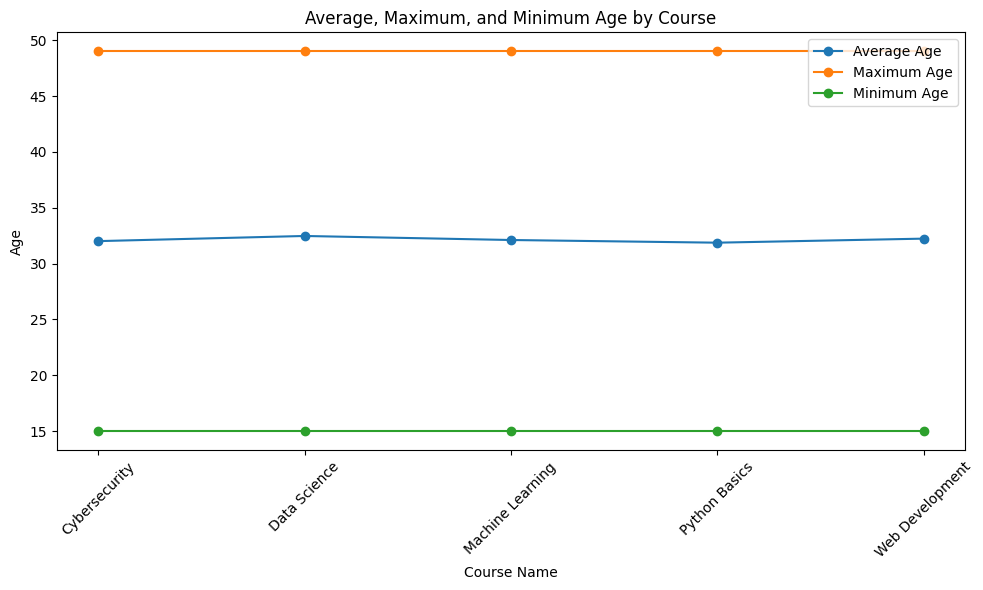

In [4]:
avg_age = df.groupby('Course_Name')['Age'].mean().reset_index()
max_age = df.groupby('Course_Name')['Age'].max().reset_index()
min_age = df.groupby('Course_Name')['Age'].min().reset_index()
plt.figure(figsize=(10, 6))
plt.plot(avg_age['Course_Name'], avg_age['Age'], label='Average Age', marker='o')
plt.plot(max_age['Course_Name'], max_age['Age'], label='Maximum Age', marker='o')
plt.plot(min_age['Course_Name'], min_age['Age'], label='Minimum Age', marker='o')
plt.xlabel('Course Name')
plt.ylabel('Age')
plt.title('Average, Maximum, and Minimum Age by Course')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()
#sns.countplot(df, y = 'Course_Name', hue = 'Gender')

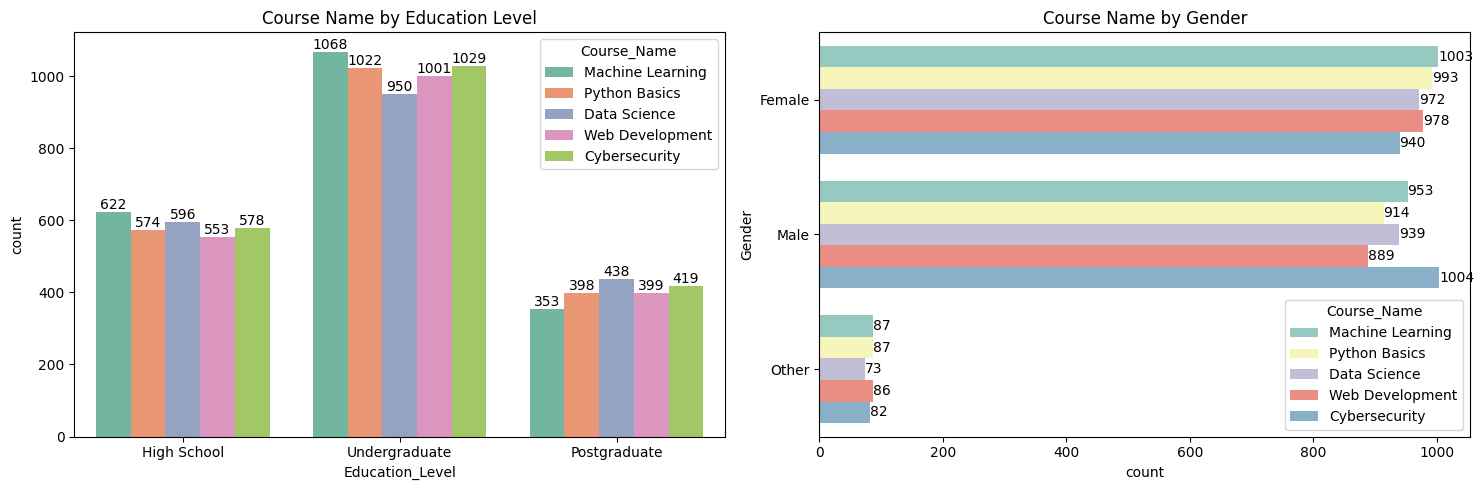

In [5]:
#Membuat subplot
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes[0].set_title('Course Name by Education Level')
axes[1].set_title('Course Name by Gender')

#Membuat plot
sns.countplot(df, x = 'Education_Level', hue = 'Course_Name', ax = axes[0], palette='Set2')
sns.countplot(df, y = 'Gender', hue = 'Course_Name', ax = axes[1], palette='Set3')
# Menambahkan angka ke dalam batang pada subplot pertama
for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%d', label_type='edge')  # Gunakan fmt untuk format angka

# Menambahkan angka ke dalam batang pada subplot kedua
for container in axes[1].containers:
    axes[1].bar_label(container, fmt='%d', label_type='edge')

# Menata layout agar rapi
plt.tight_layout()
plt.show()


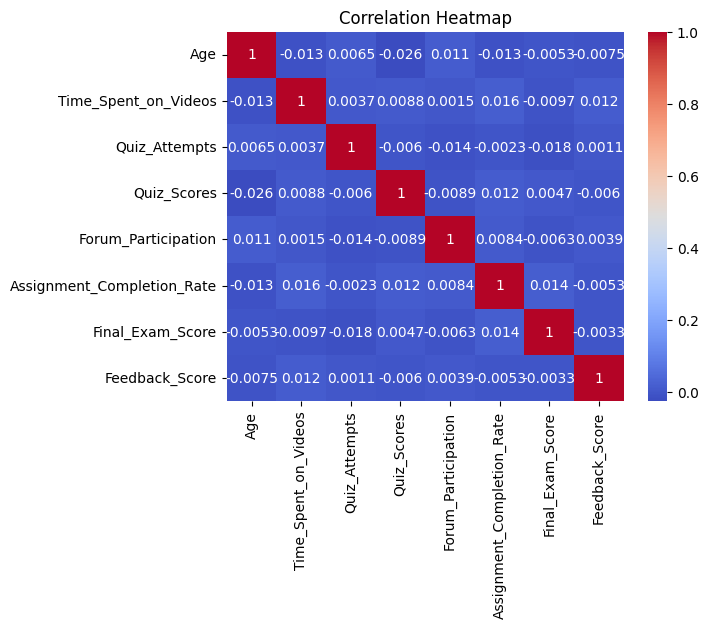

In [6]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

<ipython-input-7-6ed47101d16c>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=learning_style_exam, x='Learning_Style', y='Final_Exam_Score', ax=axes[0], palette= 'Set2')


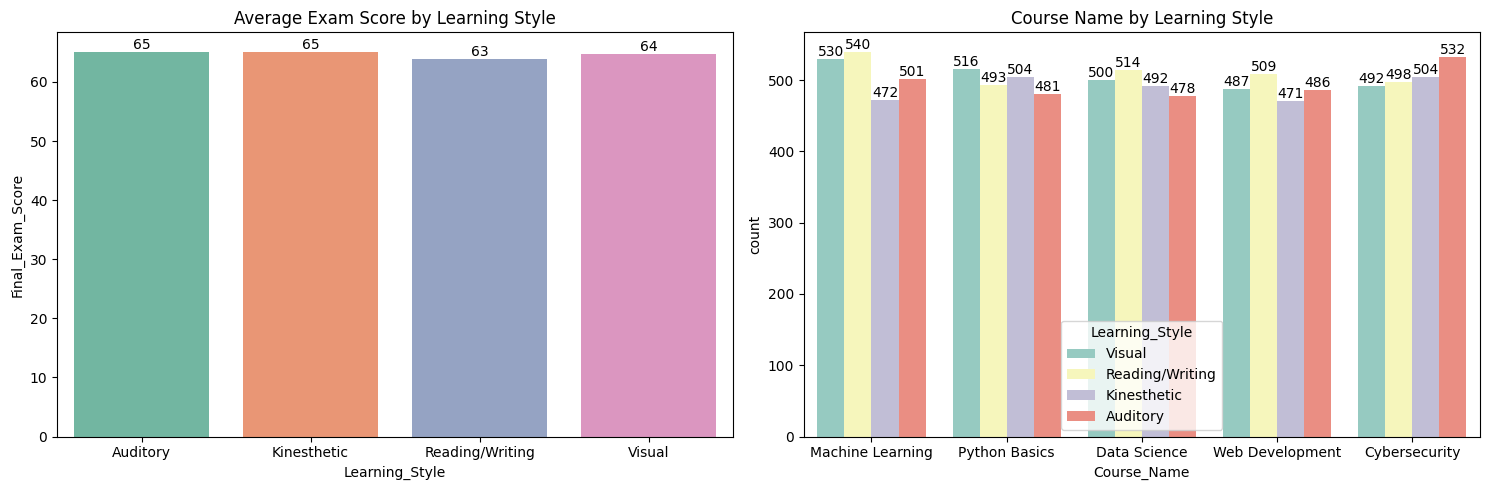

In [7]:
# Buat group berdasarkan learning style
learning_style_exam = df.groupby('Learning_Style')['Final_Exam_Score'].mean().reset_index()

# Buat subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes[0].set_title('Average Exam Score by Learning Style')
axes[1].set_title('Course Name by Learning Style')

#Buatplot
sns.barplot(data=learning_style_exam, x='Learning_Style', y='Final_Exam_Score', ax=axes[0], palette= 'Set2')
sns.countplot(data=df, x='Course_Name', hue='Learning_Style', ax=axes[1], palette='Set3')

# Menambahkan angka ke dalam batang pada subplot pertama
for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%d', label_type='edge')  # Gunakan fmt untuk format angka

# Menambahkan angka ke dalam batang pada subplot kedua
for container in axes[1].containers:
    axes[1].bar_label(container, fmt='%d', label_type='edge')

plt.tight_layout()
plt.show()


In [8]:
sns.pairplot(df, diag_kind="kde", plot_kws={"alpha": 0.5})
plt.show()

Output hidden; open in https://colab.research.google.com to view.

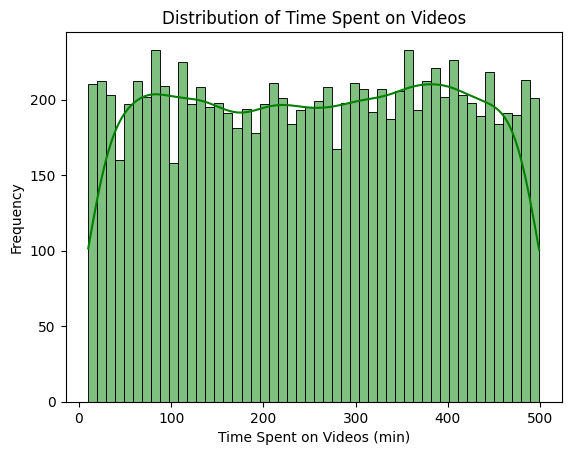

In [9]:
sns.histplot(df, x = 'Time_Spent_on_Videos', bins = 50, kde = True, color = 'green')
plt.title('Distribution of Time Spent on Videos')
plt.xlabel('Time Spent on Videos (min)')
plt.ylabel('Frequency')
plt.show()

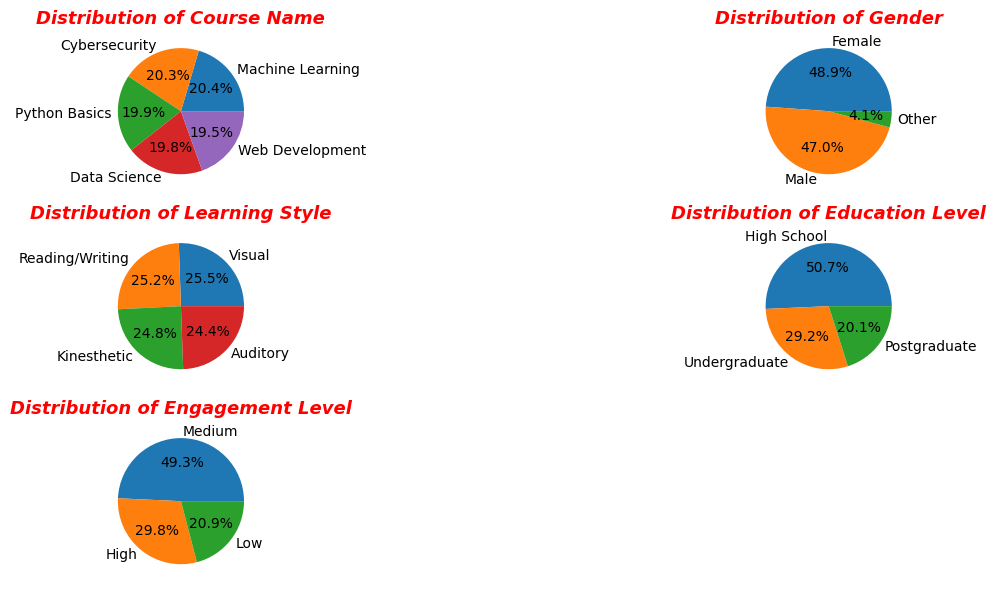

In [10]:
fig, axes = plt.subplots(3, 2, figsize=(15, 6))

# Distribution course name
axes[0,0].pie(df['Course_Name'].value_counts(),
                  labels=df['Course_Name'].value_counts().index,
                  autopct='%1.1f%%')
axes[0,0].set_title('Distribution of Course Name', fontdict={
    'fontsize': 13,
    'fontweight': 'bold',
    'color': 'red',
    'fontstyle': 'italic'
})

# Distribution Gender
axes[0,1].pie(df['Gender'].value_counts(),
              labels=df['Gender'].unique(), autopct='%1.1f%%')
axes[0,1].set_title('Distribution of Gender', fontdict={
    'fontsize': 13,
    'fontweight': 'bold',
    'color': 'red',
    'fontstyle': 'italic'
})

# Distribution Education level
axes[1,1].pie(df['Education_Level'].value_counts(),
              labels=df['Education_Level'].unique(), autopct='%1.1f%%')
axes[1,1].set_title('Distribution of Education Level', fontdict={
    'fontsize': 13,
    'fontweight': 'bold',
    'color': 'red',
    'fontstyle': 'italic'
})

# Distribution Learning style
axes[1,0].pie(df['Learning_Style'].value_counts(),
              labels=df['Learning_Style'].unique(), autopct='%1.1f%%')
axes[1,0].set_title('Distribution of Learning Style', fontdict={
    'fontsize': 13,
    'fontweight': 'bold',
    'color': 'red',
    'fontstyle': 'italic'
})

# Distribution Engagement level
axes[2,0].pie(df['Engagement_Level'].value_counts(),
              labels=df['Engagement_Level'].unique(), autopct='%1.1f%%')
axes[2,0].set_title('Distribution of Engagement Level', fontdict={
    'fontsize': 13,
    'fontweight': 'bold',
    'color': 'red',
    'fontstyle': 'italic'
})

#Set empty layout to not display
axes[2,1].set_visible(False)

# Show all plot
plt.tight_layout()
plt.show()

# Handling categorical data to numeric

In [11]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

#copy dataframe
df_encoded = df.copy()

# Apply label encoding
label_encoder = LabelEncoder()
for col in ['Gender', 'Education_Level', 'Engagement_Level', 'Dropout_Likelihood']:
  df_encoded[col] = label_encoder.fit_transform(df_encoded[col])

# choose columns for one hot encoding
one_hot_encoded = ['Course_Name', 'Learning_Style']

# Apply one-hot encoding
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(sparse_output=False,
                                                               handle_unknown='ignore')
                                      ,one_hot_encoded)], remainder='passthrough')
encoded_data = ct.fit_transform(df_encoded)

#Get feature names after transformation
feature_names = ct.get_feature_names_out(df_encoded.columns)

# Create a new DataFrame with the encoded data and correct column names
df_encoded = pd.DataFrame(encoded_data, columns=feature_names)

#drop student ID
df_encoded.drop('remainder__Student_ID', axis=1, inplace=True)


In [12]:
df_encoded.head()

,encoder__Course_Name_Cybersecurity,encoder__Course_Name_Data Science,encoder__Course_Name_Machine Learning,encoder__Course_Name_Python Basics,encoder__Course_Name_Web Development,encoder__Learning_Style_Auditory,encoder__Learning_Style_Kinesthetic,encoder__Learning_Style_Reading/Writing,encoder__Learning_Style_Visual,remainder__Age,...,remainder__Education_Level,remainder__Time_Spent_on_Videos,remainder__Quiz_Attempts,remainder__Quiz_Scores,remainder__Forum_Participation,remainder__Assignment_Completion_Rate,remainder__Engagement_Level,remainder__Final_Exam_Score,remainder__Feedback_Score,remainder__Dropout_Likelihood
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,15,...,0,171,4,67,2,89,2,51,1,0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,49,...,2,156,4,64,0,94,2,92,5,0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,20,...,2,217,2,55,2,67,2,45,1,0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,37,...,2,489,1,65,43,60,0,59,4,0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,34,...,1,496,3,59,34,88,2,93,3,0


In [13]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   encoder__Course_Name_Cybersecurity       10000 non-null  object
 1   encoder__Course_Name_Data Science        10000 non-null  object
 2   encoder__Course_Name_Machine Learning    10000 non-null  object
 3   encoder__Course_Name_Python Basics       10000 non-null  object
 4   encoder__Course_Name_Web Development     10000 non-null  object
 5   encoder__Learning_Style_Auditory         10000 non-null  object
 6   encoder__Learning_Style_Kinesthetic      10000 non-null  object
 7   encoder__Learning_Style_Reading/Writing  10000 non-null  object
 8   encoder__Learning_Style_Visual           10000 non-null  object
 9   remainder__Age                           10000 non-null  object
 10  remainder__Gender                        10000 non-null  ob

In [14]:
#Change dataframe to interger
df_encoded = df_encoded.astype(int)

In [15]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                                   Non-Null Count  Dtype
---  ------                                   --------------  -----
 0   encoder__Course_Name_Cybersecurity       10000 non-null  int64
 1   encoder__Course_Name_Data Science        10000 non-null  int64
 2   encoder__Course_Name_Machine Learning    10000 non-null  int64
 3   encoder__Course_Name_Python Basics       10000 non-null  int64
 4   encoder__Course_Name_Web Development     10000 non-null  int64
 5   encoder__Learning_Style_Auditory         10000 non-null  int64
 6   encoder__Learning_Style_Kinesthetic      10000 non-null  int64
 7   encoder__Learning_Style_Reading/Writing  10000 non-null  int64
 8   encoder__Learning_Style_Visual           10000 non-null  int64
 9   remainder__Age                           10000 non-null  int64
 10  remainder__Gender                        10000 non-null  int64
 11  rem

In [16]:
X = df_encoded.drop('remainder__Dropout_Likelihood', axis=1).values
y = df_encoded['remainder__Dropout_Likelihood'].values
#

In [17]:
X

array([[ 0,  0,  1, ...,  2, 51,  1],
       [ 0,  0,  0, ...,  2, 92,  5],
       [ 0,  0,  0, ...,  2, 45,  1],
       ...,
       [ 0,  0,  1, ...,  0, 64,  1],
       [ 0,  0,  0, ...,  2, 38,  2],
       [ 0,  0,  1, ...,  2, 97,  2]])

In [19]:
X.shape

(10000, 20)

In [20]:
y

array([0, 0, 0, ..., 0, 0, 0])

In [21]:
y.shape

(10000,)

#Train test *split*

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# *Feature Scaling*

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# *Build Model and train it*

In [33]:
# Random forest model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)

# Predict and evaluate model
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Random Forest Accuracy: 0.8115
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.81      1.00      0.90      1623
           1       0.00      0.00      0.00       377

    accuracy                           0.81      2000
   macro avg       0.41      0.50      0.45      2000
weighted avg       0.66      0.81      0.73      2000

Random Forest Confusion Matrix:
 [[1623    0]
 [ 377    0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [34]:
# XGboost model
from xgboost import XGBClassifier
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

#predict
y_pred_xgb = xgb_model.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

#evaluate model
print("XGBoost Accuracy:", accuracy_xgb)
print("XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("XGBoost Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))

XGBoost Accuracy: 0.787
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.96      0.88      1623
           1       0.16      0.03      0.05       377

    accuracy                           0.79      2000
   macro avg       0.49      0.50      0.47      2000
weighted avg       0.69      0.79      0.72      2000

XGBoost Confusion Matrix:
 [[1562   61]
 [ 365   12]]


it has imbalance data

In [35]:
# undersampling majority class
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)



In [37]:
print("Original dataset shape:", X.shape, y.shape)
print("Resampled dataset shape:", X_resampled.shape, y_resampled.shape)
#check resample dataset shape

Original dataset shape: (10000, 20) (10000,)
Resampled dataset shape: (3914, 20) (3914,)


In [38]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [39]:
#build random forest classification
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

#predict
y_pred = rf_model.predict(X_test)

#evaluate model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.5057471264367817
Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.51      0.52       403
           1       0.49      0.50      0.49       380

    accuracy                           0.51       783
   macro avg       0.51      0.51      0.51       783
weighted avg       0.51      0.51      0.51       783

Confusion Matrix:
 [[207 196]
 [191 189]]


In [40]:
# Use SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
#

In [41]:
print("Original dataset shape:", X.shape, y.shape)
print("Resampled dataset shape:", X_resampled.shape, y_resampled.shape)
#check resample dataset shape

Original dataset shape: (10000, 20) (10000,)
Resampled dataset shape: (16086, 20) (16086,)


In [43]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [45]:
# build random forest classification
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight= 'balanced')
rf_model.fit(X_train, y_train)

#predict
y_pred = rf_model.predict(X_test)

#evaluate model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", round(accuracy,2))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8673088875077688
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.99      0.88      1606
           1       0.98      0.75      0.85      1612

    accuracy                           0.87      3218
   macro avg       0.89      0.87      0.87      3218
weighted avg       0.89      0.87      0.87      3218

Confusion Matrix:
 [[1587   19]
 [ 408 1204]]


In [46]:
# Hyperparamter tuning
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
    }
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=10, verbose=2)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print("Best Parameters:", best_params)
print("Best Model:", best_model)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best Model: RandomForestClassifier(class_weight='balanced', n_estimators=300,
                       random_state=42)


In [47]:
# build random forest classification after hyperparameter tuning
rf_model = RandomForestClassifier(n_estimators=300, random_state=42, class_weight= 'balanced')
rf_model.fit(X_train, y_train)

#predict
y_pred = rf_model.predict(X_test)

#evaluate model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", round(accuracy,2))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.87
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.99      0.88      1606
           1       0.99      0.75      0.85      1612

    accuracy                           0.87      3218
   macro avg       0.89      0.87      0.87      3218
weighted avg       0.89      0.87      0.87      3218

Confusion Matrix:
 [[1594   12]
 [ 408 1204]]


In [48]:
# build XGboost model
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

#predict
y_pred_xgb = xgb_model.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("XGBoost Accuracy:", round(accuracy_xgb, 2))
print("XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("XGBoost Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
#

XGBoost Accuracy: 0.85
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.95      0.86      1606
           1       0.93      0.75      0.83      1612

    accuracy                           0.85      3218
   macro avg       0.86      0.85      0.85      3218
weighted avg       0.86      0.85      0.85      3218

XGBoost Confusion Matrix:
 [[1521   85]
 [ 400 1212]]


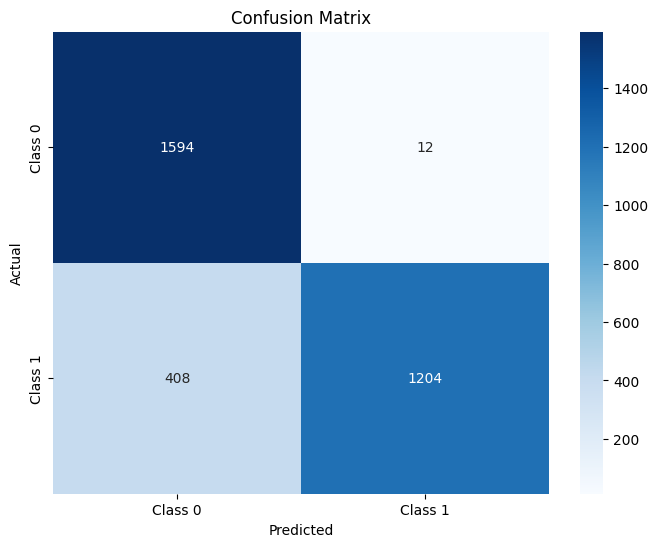

In [50]:
# Confussion matrix visualization
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



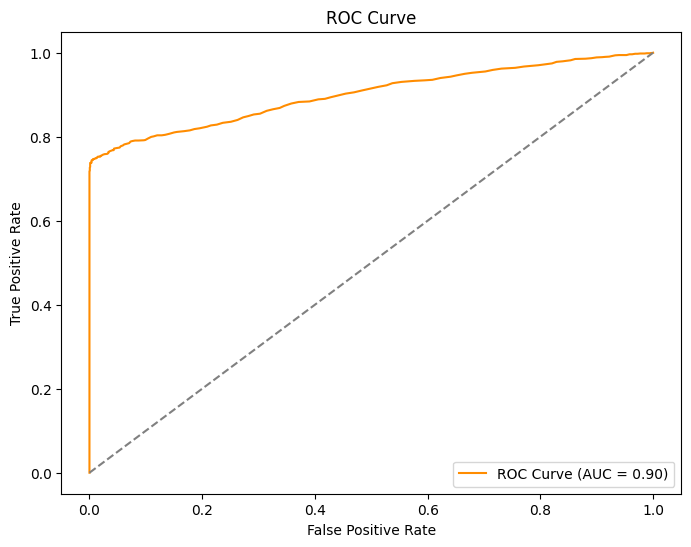

In [51]:
# ROC CURVE
from sklearn.metrics import roc_curve, auc

y_pred_proba = rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Garis diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

